In [288]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, Rectangle



pd.set_option("display.max_columns", None)
passing_df = pd.read_csv('../data/processed/fbref/ENG-Premier League/2024-2025/player_season/passing.csv', usecols=["team", "player", "player_id","position", "att", "cmp", "prgp", "90s", "cmp_cmp", "1_3", "kp", "prgdist"])
passing_2024_df = pd.read_csv('../data/processed/fbref/ENG-Premier League/2023-2024/player_season/passing.csv', usecols=["team", "player", "player_id","position", "att", "cmp", "prgp", "90s", "cmp_cmp", "1_3", "kp", "prgdist"])
poss_df = pd.read_csv('../data/processed/fbref/ENG-Premier League/2024-2025/player_season/possession.csv', usecols=["season","player_id", "touches", "def_3rd", "def_pen", "att", "succ", "carries", "prgc", "prgdist", "dis", "rec", "prgr"])
poss_2024_df = pd.read_csv('../data/processed/fbref/ENG-Premier League/2023-2024/player_season/possession.csv', usecols=["season","player_id", "touches", "def_3rd", "def_pen", "att", "succ", "carries", "prgc", "prgdist", "dis", "rec", "prgr"])

passing_df = passing_df.rename(columns={"cmp_cmp": "cmp_pct"})
passing_2024_df = passing_2024_df.rename(columns={"cmp_cmp": "cmp_pct"})
poss_df = poss_df.rename(columns={"att": "takeons", "prgdist": "prgcdist", "dis": "dispossessed"})
poss_2024_df = poss_2024_df.rename(columns={"att": "takeons", "prgdist": "prgcdist", "dis": "dispossessed"})

df_2024 = passing_2024_df

df_2024 = df_2024.merge(
    poss_2024_df, 
    on=["player_id"],
    how="left")


df = passing_df

df = df.merge(
    poss_df, 
    on=["player_id"],
    how="left")

#df = df.merge(
#    df_2024[["player_id", "90s","touches", "def_3rd", "def_pen", "takeons", "succ", "carries", "prgc", "prgcdist", "dispossessed", "rec", "prgr", "att", "cmp", "prgp", "cmp_pct", "1_3", "kp", "prgdist"]],
#    on=["player_id"],
#    how="left",
#    suffixes=("", "_2024")
#)


midfielders = df.loc[df["position"] == "MID"].copy()
midfielders = midfielders.loc[midfielders["90s"] >= 5].copy()

mids = df_2024.loc[df_2024["position"]=="MID"].copy()
mids = mids.loc[mids["90s"] >= 5].copy()

display(midfielders.head())
display(mids.sort_values(by="carries", ascending=False).head(10))

,team,player,90s,cmp,att,cmp_pct,prgdist,kp,1_3,prgp,player_id,position,season,touches,def_pen,def_3rd,takeons,succ,carries,prgcdist,prgc,dispossessed,rec,prgr
3,ARS,Declan Rice,31.4,1376,1650,83.4,6234,59,137,192,59424615,MID,2425,1948,82,325,29,14,1031,3394,90,32,1266,94
9,ARS,Jorginho,7.8,411,474,86.7,1609,3,44,48,5be7a3e1,MID,2425,522,9,93,4,1,302,874,12,9,389,6
14,ARS,Martin Ødegaard,25.8,1237,1499,82.5,5460,63,132,258,06ab6f9c,MID,2425,1694,9,126,59,25,1174,3772,92,40,1336,154
15,ARS,Mikel Merino,17.6,451,577,78.2,1776,17,40,69,6a4da7e5,MID,2425,783,37,140,23,9,388,747,11,27,504,94
24,ARS,Thomas Partey,31.1,1678,1920,87.4,7155,20,168,185,e51605ff,MID,2425,2193,74,457,35,24,1256,3691,36,17,1561,48


,team,player,90s,cmp,att,cmp_pct,prgdist,kp,1_3,prgp,player_id,position,season,touches,def_pen,def_3rd,takeons,succ,carries,prgcdist,prgc,dispossessed,rec,prgr
376,MCI,Rodri,32.6,3365,3656,92.0,15766,49,378,376,bdf572d7,MID,2324,3988,114,664,64,42,2513,6408,76,32,3242,55
141,BHA,Pascal Groß,34.6,2774,3223,86.1,13360,103,242,302,8695796f,MID,2324,3534,133,826,30,16,2284,5189,83,28,2736,180
417,NEW,Bruno Guimarães,36.3,1941,2313,83.9,9336,62,184,283,d307d495,MID,2324,2734,90,573,132,72,1842,4241,65,70,2107,73
5,ARS,Declan Rice,35.8,2041,2295,88.9,9378,47,240,278,59424615,MID,2324,2650,100,581,46,21,1675,5139,75,22,1928,64
18,ARS,Martin Ødegaard,34.3,1692,2006,84.3,7898,102,160,344,06ab6f9c,MID,2324,2326,24,244,81,37,1563,3514,91,58,1827,202
352,MCI,Bernardo Silva,28.6,1671,1936,86.3,5246,64,100,177,b845a912,MID,2324,2194,39,245,61,38,1500,4544,140,34,1757,260
190,CHE,Conor Gallagher,34.8,1801,2018,89.2,5954,52,135,172,808a57c7,MID,2324,2443,77,468,65,38,1453,2979,62,39,1739,122
122,BHA,Billy Gilmour,23.6,1915,2107,90.9,7671,22,183,193,f70870eb,MID,2324,2277,67,447,23,8,1410,3120,39,9,1871,33
32,AVL,Douglas Luiz,33.3,1800,2101,85.7,7807,53,137,168,cac8d239,MID,2324,2351,81,519,47,24,1394,3562,60,31,1638,50
201,CHE,Moisés Caicedo,31.8,1907,2119,90.0,8181,23,176,173,b94b9100,MID,2324,2452,122,687,56,26,1378,2466,27,24,1828,27


In [289]:
midfielders.columns.value_counts().loc[lambda s: s > 1]


Series([], Name: count, dtype: int64)

In [290]:
#passes per 90
ppg = midfielders["cmp"] / midfielders["90s"]
distpg = midfielders["prgdist"] / midfielders["90s"]
prg = midfielders["prgp"] / midfielders["90s"]
touches = midfielders["touches"] / midfielders["90s"]
def_pen = midfielders["def_pen"] / midfielders["90s"]
carries = midfielders["carries"] / midfielders["90s"]
def_3rd = midfielders["def_3rd"] / midfielders["90s"]
d_p90 = midfielders["dispossessed"] / midfielders["90s"]


midfielders["passes_p90"] = round(ppg, 2)
midfielders["prg_distp90"] = round(distpg, 2)
midfielders["prg_passes90"] = round(prg, 2)
midfielders["touches_p90"] = round(touches, 2)
midfielders["def_pen_p90"] = round(def_pen, 2)
midfielders["carries_p90"] = round(carries, 2)
midfielders["def_3rd_p90"] = round(def_3rd, 2)
midfielders["d_90"] = round(d_p90, 2)



In [291]:
#passes per 90 2023-2024 season 
ppg = mids["cmp"] / mids["90s"] 
distpg = mids["prgdist"] / mids["90s"] 
prg = mids["prgp"] / mids["90s"] 
touches = mids["touches"] / mids["90s"] 
def_pen = mids["def_pen"] / mids["90s"] 
carries = mids["carries"] / 90 
def_3rd = mids["def_3rd"] / mids["90s"] 
d_p90 = mids["dispossessed"] / mids["90s"] 

mids["passes_p90"] = round(ppg, 2) 
mids["prg_distp90"] = round(distpg, 2) 
mids["prg_passes90"] = round(prg, 2) 
mids["touches_p90"] = round(touches, 2) 
mids["def_pen_p90"] = round(def_pen, 2) 
mids["carries_p90"] = round(carries, 2) 
mids["def_3rd_p90"] = round(def_3rd, 2) 
mids["d_90"] = round(d_p90, 2)

In [292]:
#Setting the metrics to be displayed 2024-2025 season and 2023-2024 season

touches = (
	midfielders.groupby("player", as_index=False)[["touches_p90"]]
	.mean()
	.sort_values("touches_p90", ascending=False)
)

passes = (
    midfielders.groupby("player", as_index=False)[["passes_p90"]]
    .mean()
    .sort_values("passes_p90", ascending=False)
)

prg_passes = (
    midfielders.groupby("player", as_index=False)[["prg_passes90"]]
    .mean()
    .sort_values("prg_passes90", ascending=False)
)

dispossessed = (
    midfielders.groupby("player", as_index=False)[["d_90"]]
    .mean()
    .sort_values("d_90", ascending=False)
)






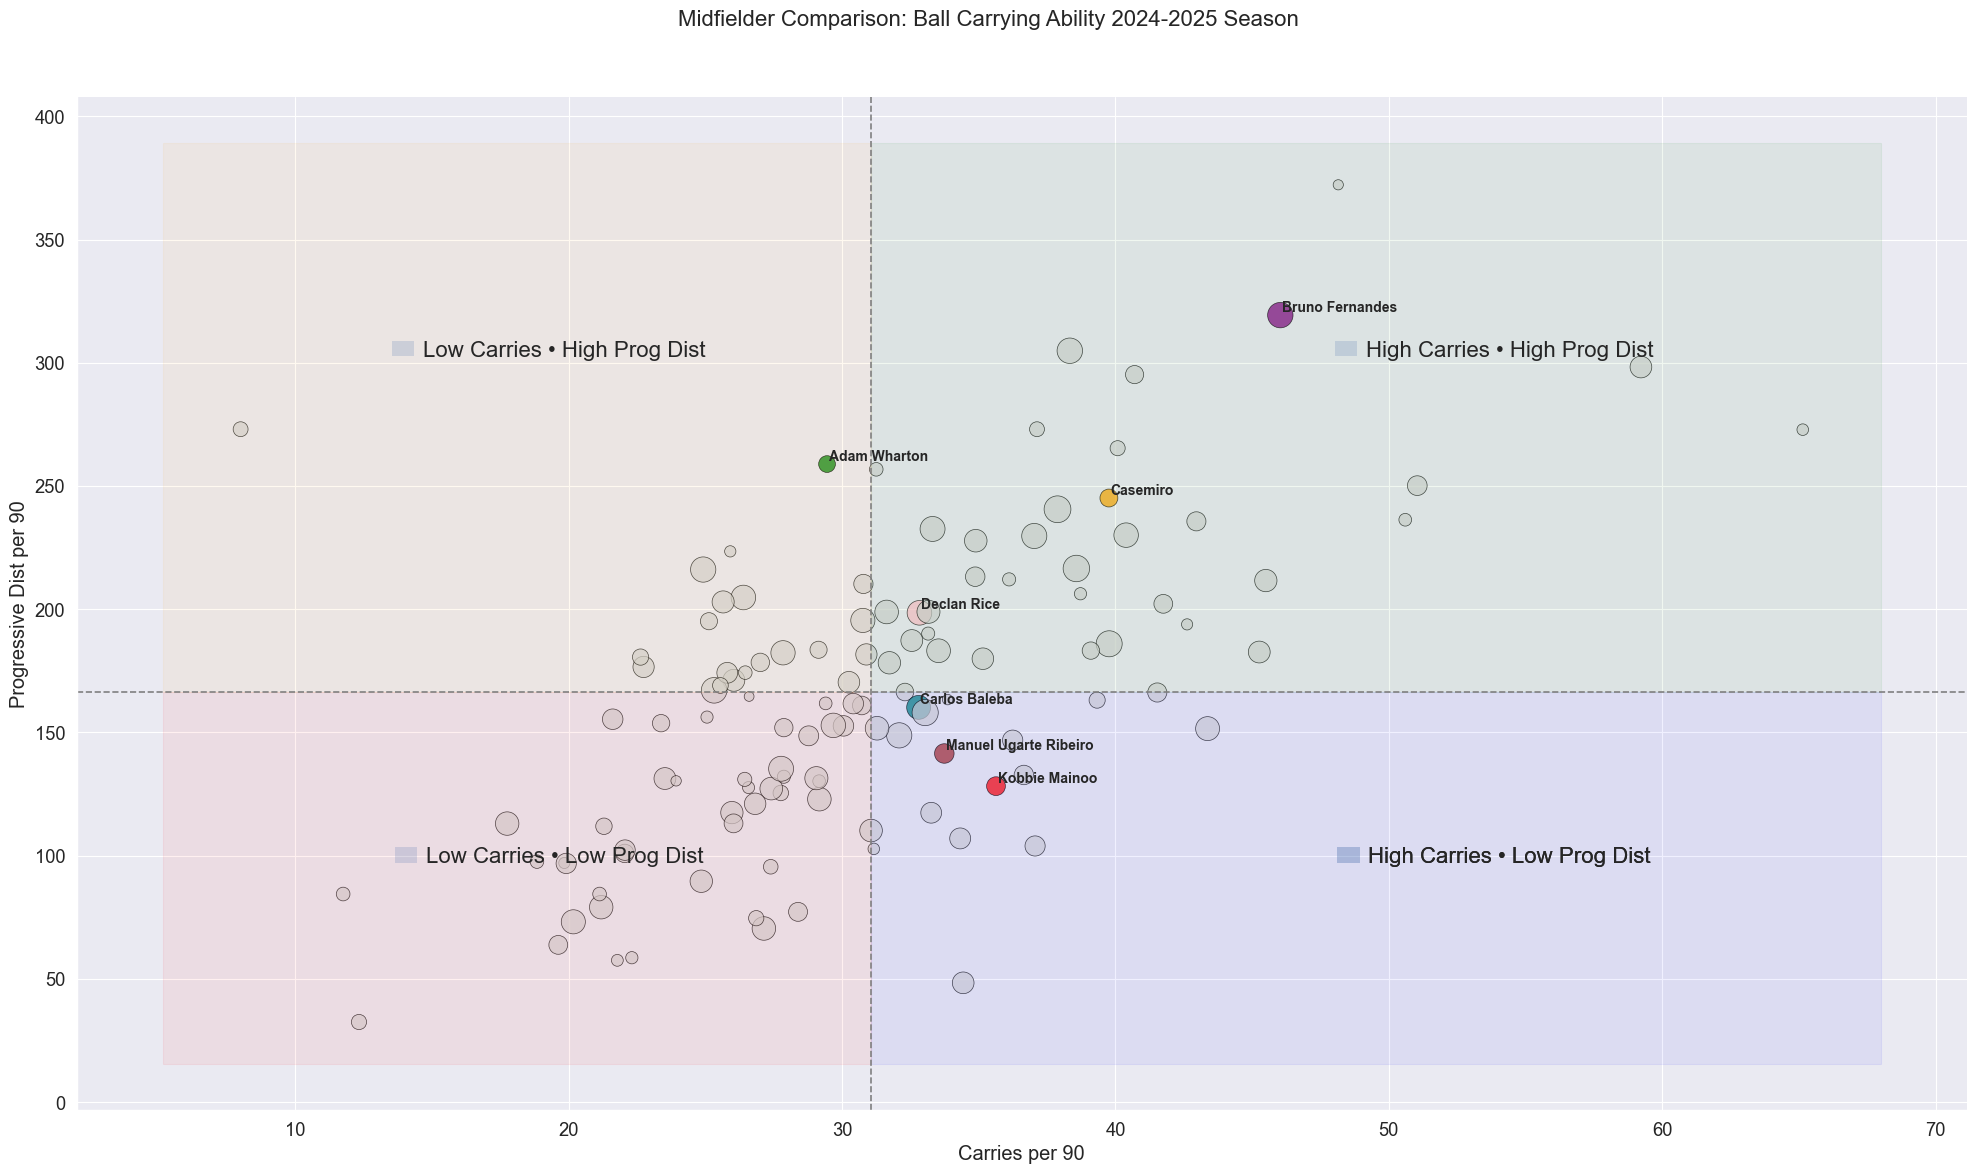

In [293]:

fig, axes = plt.subplots(figsize=(20, 12), sharey=True)
fig.suptitle("Midfielder Comparison: Ball Carrying Ability 2024-2025 Season", fontsize=16)


ball_security = midfielders.eval("touches_p90 / d_90")
playtime = midfielders["90s"] * 10

x_med = midfielders["carries_p90"].mean()
y_med = midfielders["prg_distp90"].mean()


players = ["Kobbie Mainoo", "Carlos Baleba", "Adam Wharton", "Bruno Fernandes", "Casemiro", "Manuel Ugarte Ribeiro", "Declan Rice"]
mask = midfielders["player"].isin(players)
midfielders["legend"] = np.where(mask, midfielders["player"], "Other")

palette = {
    "Kobbie Mainoo": "red",
    "Carlos Baleba": "teal",
    "Adam Wharton": "green",
    "Bruno Fernandes": "purple",
    "Casemiro": "orange",
    "Manuel Ugarte Ribeiro": "brown",
    "Declan Rice": "pink",
    "Other": "lightgrey"
}

regions = [
    ("Low Carries • Low Prog Dist",    (0.25, 0.25)),  # bottom-left
    ("Low Carries • High Prog Dist", (0.25, 0.75)),  # top-left
    ("High Carries • High Prog Dist",  (0.75, 0.75)),  # top-right
    ("High Carries • Low Prog Dist",   (0.75, 0.25)),  # bottom-right
]

for label, anchor in regions:
    leg = axes.legend(
        handles=[Patch(alpha=0.20, edgecolor="none", label=label)],
        loc="center", bbox_to_anchor=anchor, bbox_transform=axes.transAxes,
        frameon=False, handlelength=1.0, handletextpad=0.4, borderpad=0.2, fontsize=16,
        title=None
    )
    axes.add_artist(leg) 


#Styling the scatter plot
sns.set_theme()
#sns.set_style("ticks")
sns.despine()
sns.set_context("paper", font_scale=1.5)


# first subplot: carries per 90 vs progressive distance per 90 in 2024-2025 season
sns.scatterplot(data=midfielders, x="carries_p90", y="prg_distp90", ax=axes, hue="legend", s=playtime, palette=palette, legend=False, alpha=0.7, edgecolor="black", linewidth=0.5)
axes.axvline(x=x_med, color='grey', linestyle='--')
axes.axhline(y=y_med, color='grey', linestyle='--')
axes.set_xlabel("Carries per 90")
axes.set_ylabel("Progressive Dist per 90")

#Highlight quadrants
xmin, xmax = axes.get_xlim()
ymin, ymax = axes.get_ylim()

# 1) Subset rows to label
ann = midfielders.loc[mask, ["player", "carries_p90", "prg_distp90"]].dropna()

# 2) Small data-space offsets to reduce overlap with markers
dx = 0.001 * (xmax - xmin)
dy = 0.001 * (ymax - ymin)

# 3) Draw labels
for _, r in ann.iterrows():
    axes.text(
        r["carries_p90"] + dx, r["prg_distp90"] + dy, r["player"],
        fontsize=10, weight="bold", ha="left", va="bottom", zorder=5,
        
    )

axes.fill_between([xmin, x_med], ymin, y_med, color='red', alpha=0.06, label="Low Carries & Low Progressive Distance") #bottom-left
axes.fill_between([xmin, x_med], ymax, y_med, color='orange', alpha=0.06, label="High Progressive Dist & Low Carries") #top-left
axes.fill_betweenx([ymax, y_med], xmax, x_med, color='green', alpha=0.06, label="High Progressive Dist & High Carries") #top-right
axes.fill_betweenx([ymin, y_med], xmax, x_med, color='blue', alpha=0.06, label="High Carries & Low Progressive Distance") #bottom-right





plt.sca(axes)







# adjust layout to accommodate the suptitle
# use a tuple for `rect` to satisfy the type checker (tuple[float, float, float, float])
plt.tight_layout(rect=(0, 0, 1, 0.96))

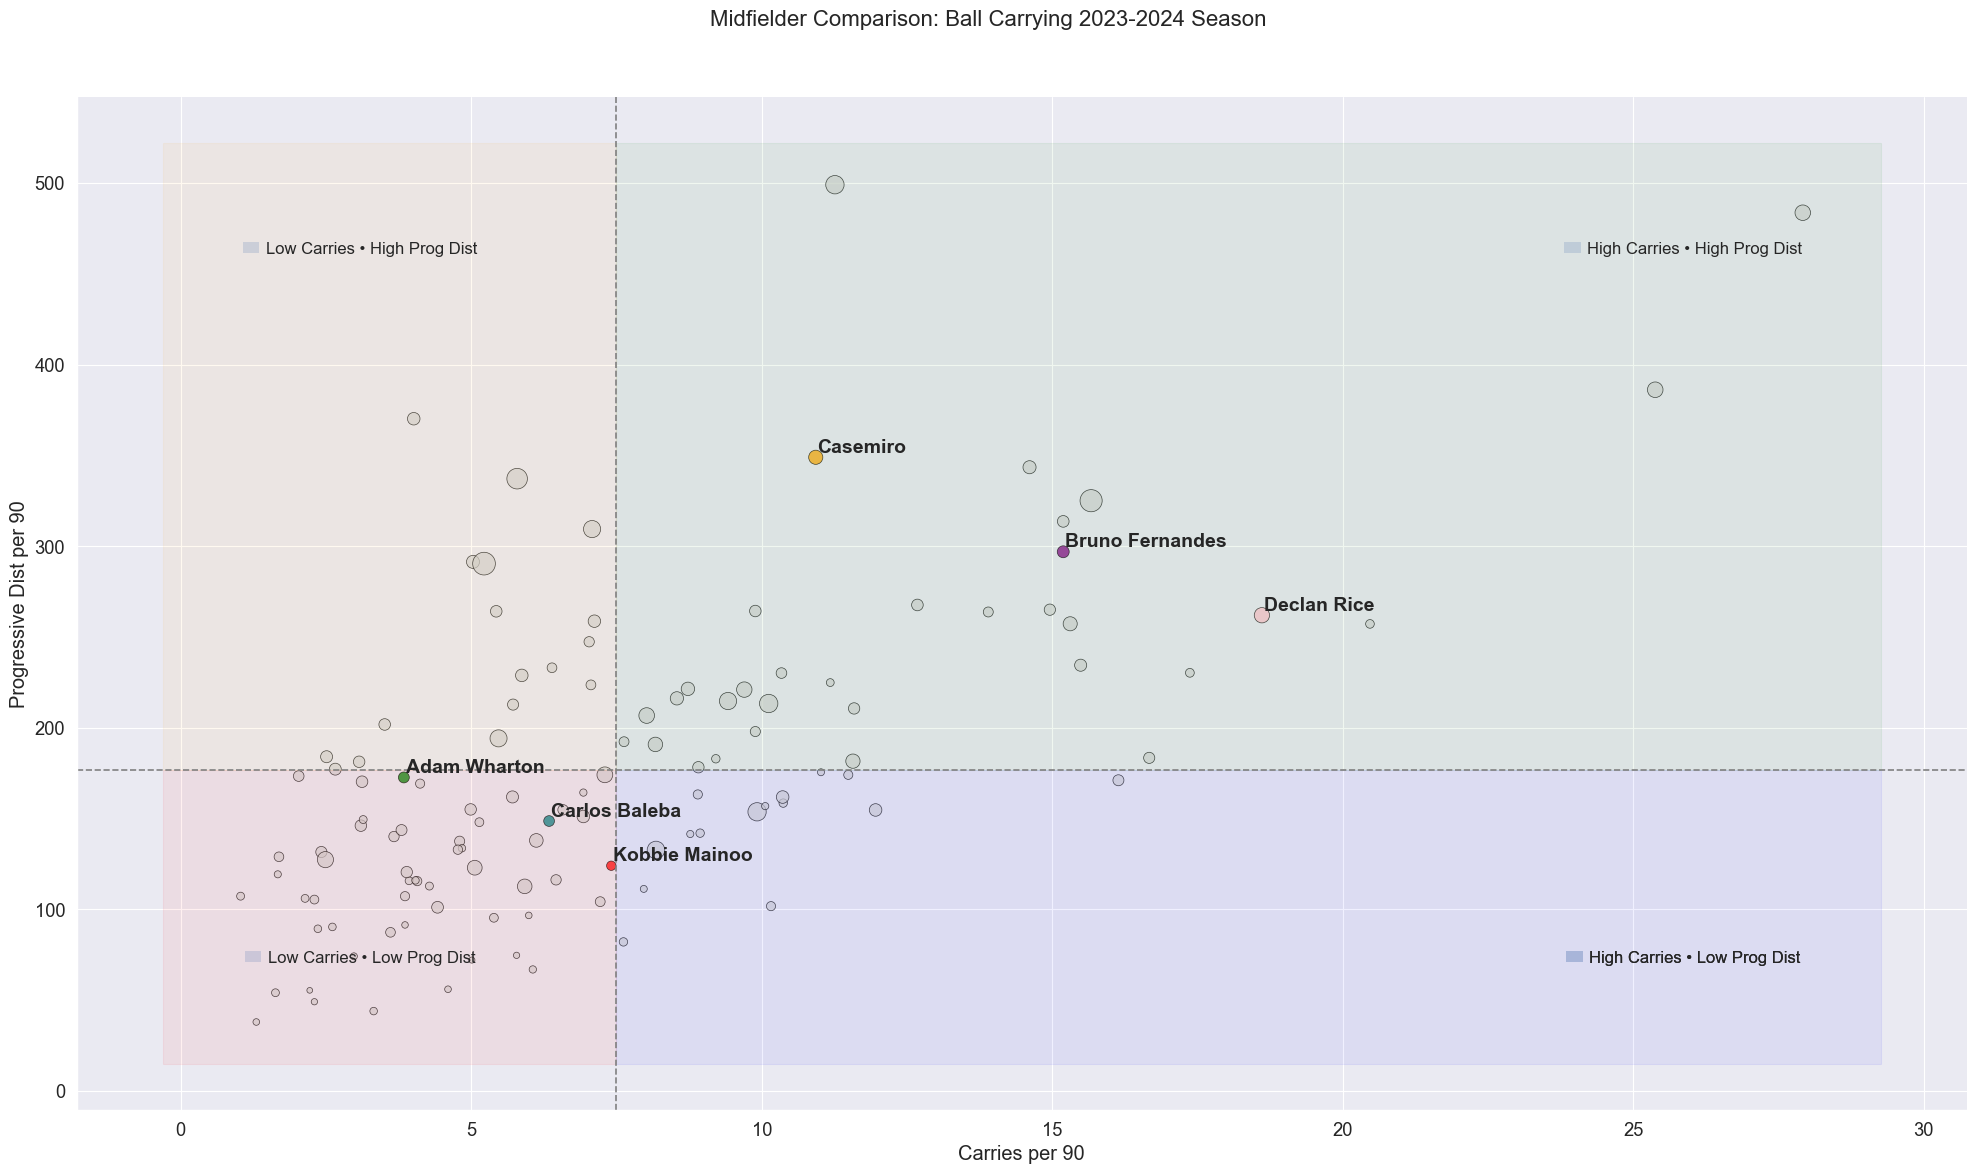

In [294]:

fig, axes = plt.subplots(figsize=(20, 12), sharey=True)
fig.suptitle("Midfielder Comparison: Ball Carrying 2023-2024 Season", fontsize=16)

ball_security_2024 = mids.eval("touches_p90 / d_90")


x_2024_med = mids["carries_p90"].mean()
y_2024_med = mids["prg_distp90"].mean()



players = ["Kobbie Mainoo", "Carlos Baleba", "Adam Wharton", "Bruno Fernandes", "Casemiro", "Manuel Ugarte Ribeiro", "Declan Rice"]
mask_2024 = mids["player"].isin(players)
mids["legend"] = np.where(mask_2024, mids["player"], "Other")

palette = {
    "Kobbie Mainoo": "red",
    "Carlos Baleba": "teal",
    "Adam Wharton": "green",
    "Bruno Fernandes": "purple",
    "Casemiro": "orange",
    "Manuel Ugarte Ribeiro": "brown",
    "Declan Rice": "pink",
    "Other": "lightgrey"
}

regions = [
    ("Low Carries • Low Prog Dist",    (0.15, 0.15)),  # bottom-left
    ("Low Carries • High Prog Dist", (0.15, 0.85)),  # top-left
    ("High Carries • High Prog Dist",  (0.85, 0.85)),  # top-right
    ("High Carries • Low Prog Dist",   (0.85, 0.15)),  # bottom-right
]

for label, anchor in regions:
    leg = axes.legend(
        handles=[Patch(alpha=0.20, edgecolor="none", label=label)],
        loc="center", bbox_to_anchor=anchor, bbox_transform=axes.transAxes,
        frameon=False, handlelength=1.0, handletextpad=0.4, borderpad=0.2, fontsize=12,
        title=None
    )
    axes.add_artist(leg) 


#Styling the scatter plot
sns.set_theme()
#sns.set_style("ticks")
sns.despine()
sns.set_context("paper", font_scale=1.5)



#plot with carries per 90 vs progressive distance per 90 in 2023-2024 season
sns.scatterplot(data=mids, x="carries_p90", y="prg_distp90", ax=axes, hue="legend", s=ball_security_2024, palette=palette, legend=False, alpha=0.7, edgecolor="black", linewidth=0.5)
axes.axvline(x=x_2024_med, color='grey', linestyle='--')
axes.axhline(y=y_2024_med, color='grey', linestyle='--')
axes.set_xlabel("Carries per 90")
axes.set_ylabel("Progressive Dist per 90")

#Highlight quadrants
xmin, xmax = axes.get_xlim()
ymin, ymax = axes.get_ylim()

# 1) Subset rows to label
ann = mids.loc[mask_2024, ["player", "carries_p90", "prg_distp90"]].dropna()

# 2) Small data-space offsets to reduce overlap with markers
dx = 0.001 * (xmax - xmin)
dy = 0.001 * (ymax - ymin)

# 3) Draw labels
for _, r in ann.iterrows():
    axes.text(
        r["carries_p90"] + dx, r["prg_distp90"] + dy, r["player"],
        fontsize=14, weight="bold", ha="left", va="bottom", zorder=5,
        
    )



axes.fill_between([xmin, x_2024_med], ymin, y_2024_med, color='red', alpha=0.06) #bottom-left
axes.fill_between([xmin, x_2024_med], ymax, y_2024_med, color='orange', alpha=0.06) #top-left
axes.fill_betweenx([ymax, y_2024_med], xmax, x_2024_med, color='green', alpha=0.06) #top-right
axes.fill_betweenx([ymin, y_2024_med], xmax, x_2024_med, color='blue', alpha=0.06) #bottom-right
plt.sca(axes)

# second subplot: passes per 90 vs progressive distance per 90
#sns.scatterplot(data=midfielders, x="passes_p90", y="prg_distp90", ax=axes, hue="player", s=100)
#axes.set_title("Passes per 90 vs Progressive Distance per 90")
#axes.set_xlabel("passes per 90")
#axes.set_ylabel("progressive distance per 90")
#plt.sca(axes)
#plt.xticks(rotation=45, ha="right")

# adjust layout to accommodate the suptitle
plt.tight_layout(rect=[0, 0, 1, 0.96])